# A) Correlation Analysis

Goal of this notebook is to look at the correlation between different demographic factors and the shares of HH sizes

In [85]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr
from scipy import stats

In [62]:
#load data frame
data = pd.read_csv("data2016.csv").drop(columns="Unnamed: 0")
data.columns

Index(['Commune', 'Total', '1HH', '2HH', '3HH', '4HH', '5HH', '6HH', 'canton',
       'region', 'median_income', 'Gemeindecode',
       'Bevölkerungs-dichte pro km²', 'Ausländer in %', 'Sozialhilfequote',
       '0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr', 'FDP 2)', 'SP',
       'SVP'],
      dtype='object')

In [63]:
#define columns to be looked at
df = data[['1HH', '2HH', '3HH', '4HH', '5HH', '6HH', 'median_income','Bevölkerungs-dichte pro km²', 'Ausländer in %','Sozialhilfequote', 'SVP']]

### A1) Without data transformation

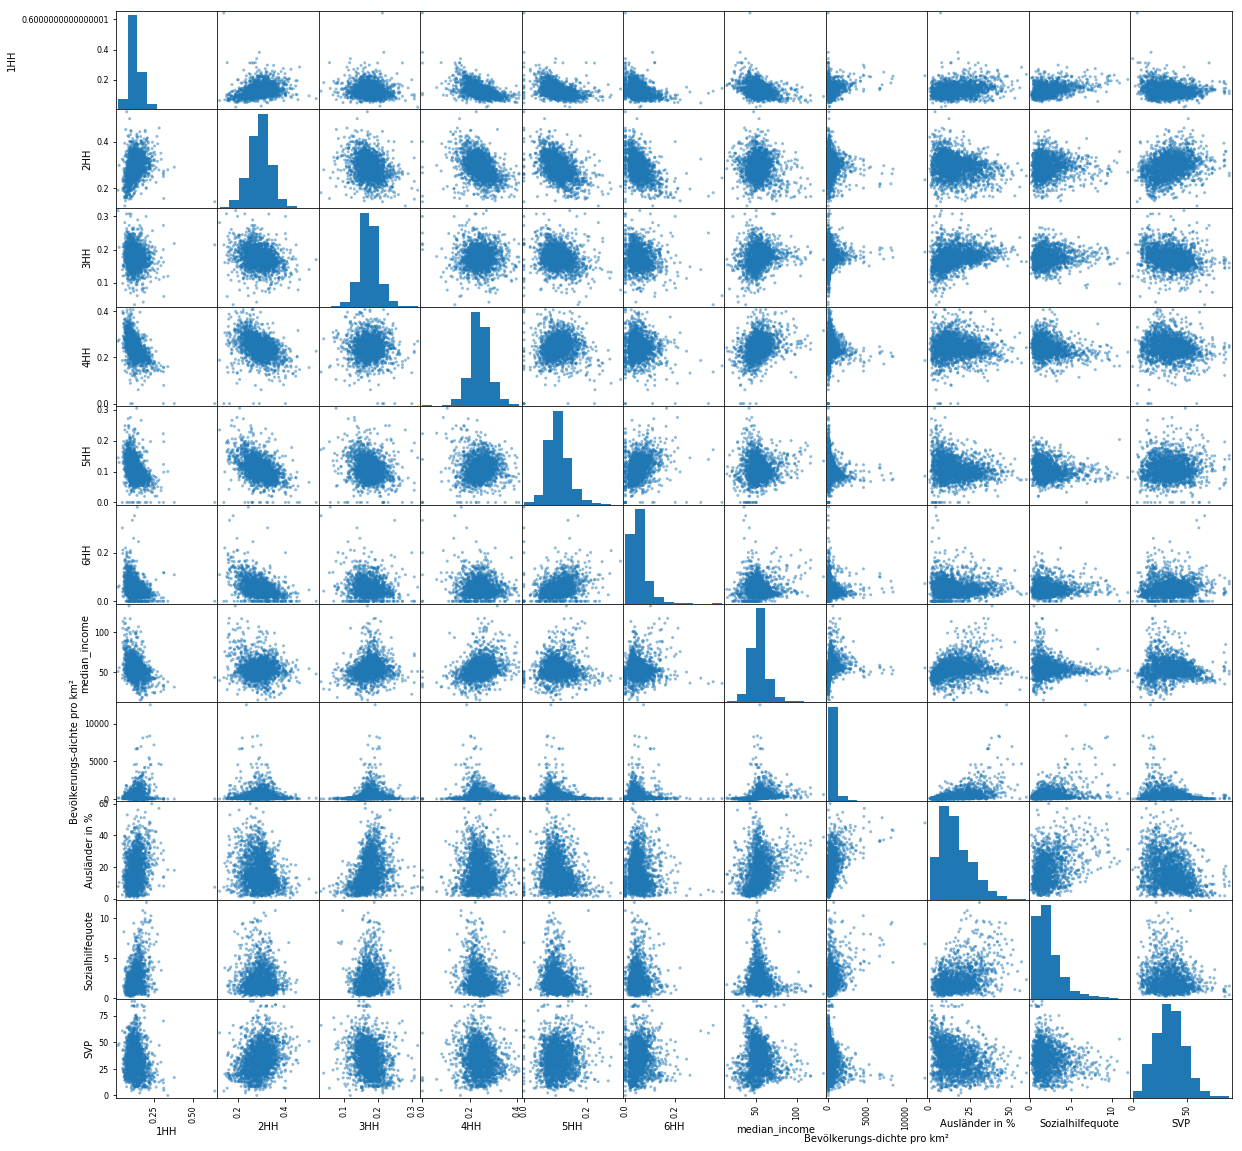

In [45]:
#analyse scatter matrix for some factors
scatter_matrix(df, figsize=(20,20))
plt.show()

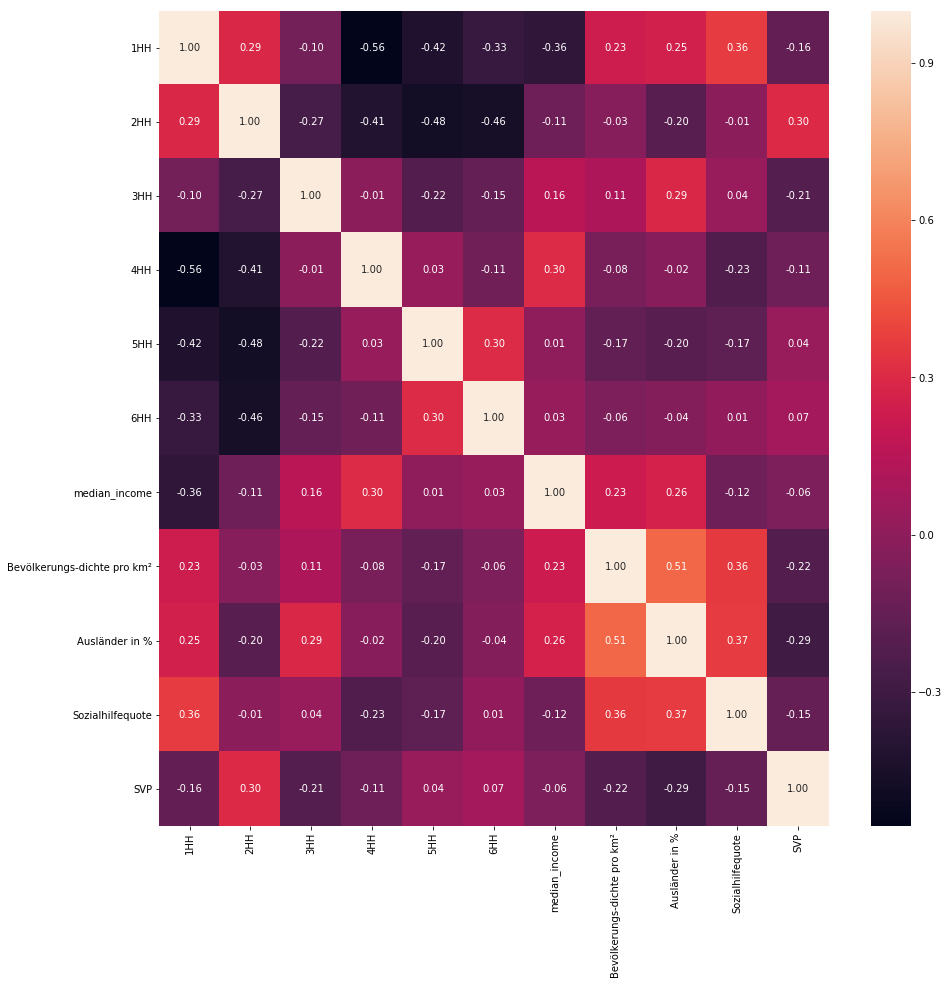

In [81]:
#get correlations and look at heat map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), xticklabels=corr_log.columns, yticklabels=corr_log.columns, annot=True, fmt=".2f")
plt.show()

From the scatter matrix it seems that variables "population density", "foreigner %" and "social assistance rate" need to be logtransformed.

### A2) After Log-Transformation

Log transform data -> we need to ignore rows with NaN values

In [65]:
df_log = df.dropna()
df_log.loc[:,['Bevölkerungs-dichte pro km²', 'Ausländer in %','Sozialhilfequote']]= df_log.loc[:,['Bevölkerungs-dichte pro km²', 'Ausländer in %','Sozialhilfequote']].transform(lambda x: np.log(x))

/home/simu/anaconda3/envs/ada/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/simu/anaconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


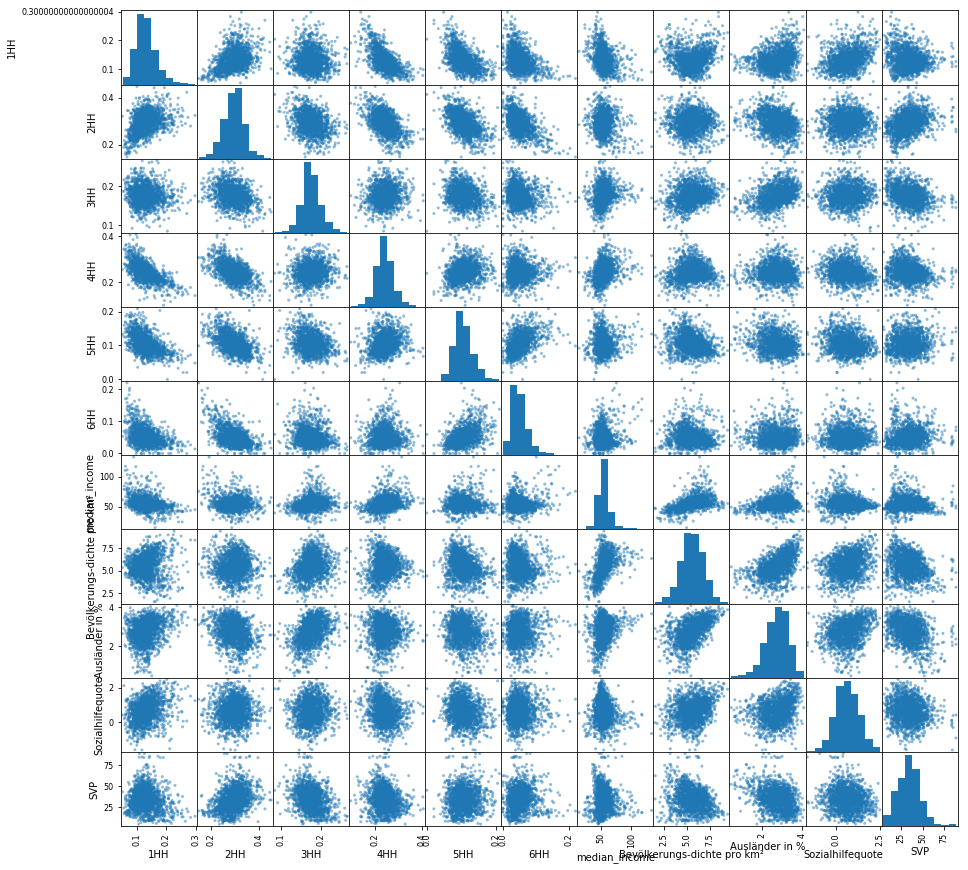

In [69]:
scatter_matrix(df_log, figsize=(15,15))
plt.show()

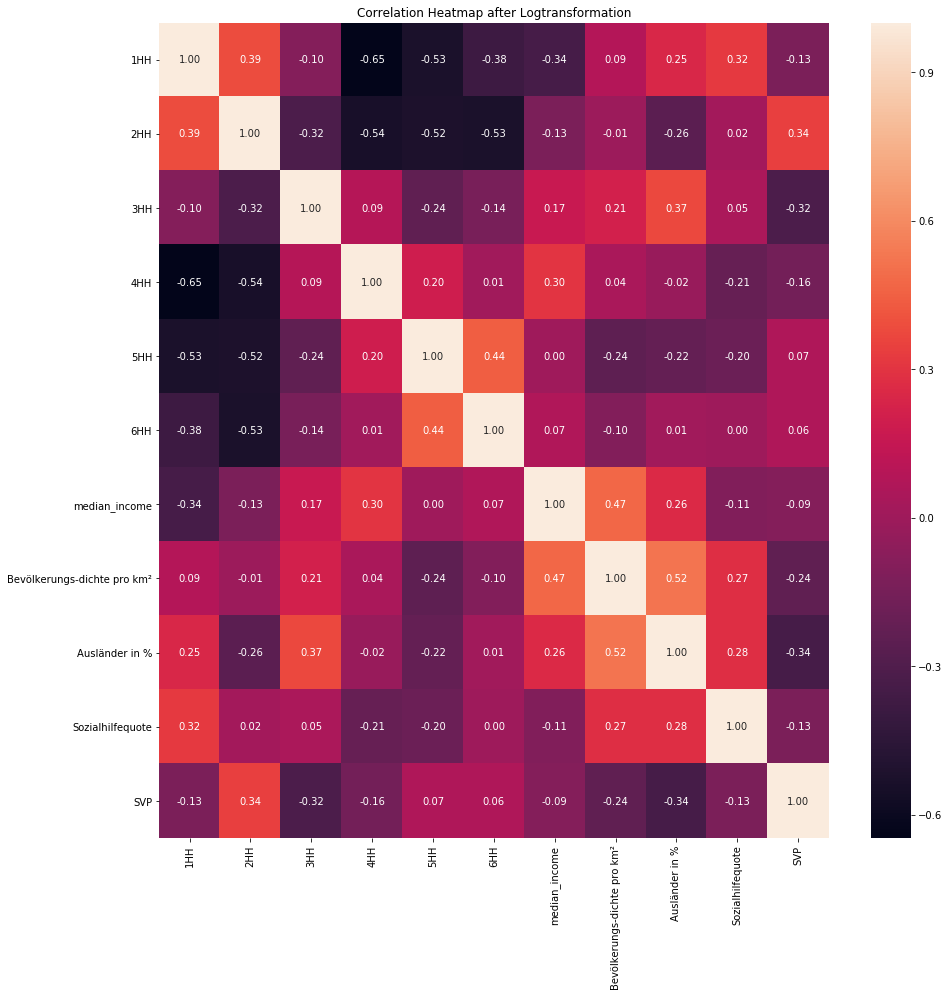

In [82]:
plt.figure(figsize=(15,15))
plt.title("Correlation Heatmap after Logtransformation")
sns.heatmap(df_log.corr(), xticklabels=corr_log.columns, yticklabels=corr_log.columns, annot=True, fmt=".2f")
plt.show()

## Significance of correlations -> p-values

In [100]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = pearsonr(df[r], df[c])[1]
    return pvalues

In [101]:
p_matrix = calculate_pvalues(df)
p_matrix

,1HH,2HH,3HH,4HH,5HH,6HH,median_income,Bevölkerungs-dichte pro km²,Ausländer in %,Sozialhilfequote,SVP
1HH,0,2.1925e-59,0.000114467,2.19832e-194,9.52355e-119,2.33759e-57,2.30879e-45,2.72808e-36,4.94444e-34,1.17012e-51,1.11642e-07
2HH,2.1925e-59,0,1.85596e-39,4.83395e-126,2.35248e-114,1.53327e-117,1.79873e-07,0.0495402,5.69272e-28,0.628713,2.1362e-46
3HH,0.000114467,1.85596e-39,0,0.000265394,4.45372e-22,1.32928e-08,1.29016e-11,4.12181e-08,2.35547e-48,0.151629,1.18817e-39
4HH,2.19832e-194,4.83395e-126,0.000265394,0,1.70712e-15,0.603776,1.70055e-35,9.81282e-08,0.00138106,4.93063e-21,8.39016e-11
5HH,9.52355e-119,2.35248e-114,4.45372e-22,1.70712e-15,0,6.982e-79,0.877154,1.07282e-16,2.49518e-16,5.71948e-12,0.00854454
6HH,2.33759e-57,1.53327e-117,1.32928e-08,0.603776,6.982e-79,0,0.00486413,0.0758397,0.037043,0.513655,0.0129307
median_income,2.30879e-45,1.79873e-07,1.29016e-11,1.70055e-35,0.877154,0.00486413,0,1.28991e-16,9.26989e-17,2.51079e-06,0.000143455
Bevölkerungs-dichte pro km²,2.72808e-36,0.0495402,4.12181e-08,9.81282e-08,1.07282e-16,0.0758397,1.28991e-16,0,4.01654e-105,2.20139e-51,3.01395e-25
Ausländer in %,4.94444e-34,5.69272e-28,2.35547e-48,0.00138106,2.49518e-16,0.037043,9.26989e-17,4.01654e-105,0,2.72418e-52,3.75172e-39
Sozialhilfequote,1.17012e-51,0.628713,0.151629,4.93063e-21,5.71948e-12,0.513655,2.51079e-06,2.20139e-51,2.72418e-52,0,3.40884e-09


**Interpretation**: The correlation with |correlations| > 0.2 which we regard as 'weak correlations' all have a very low p-value. Which indicates that this weak correlation is highly significance.
However, the fact that there are many communes(objects), influences this result of the p-values. P-values have to be regarded with caution.

# Group by regions

This analysis aims at detecting any differences in the Swiss regions. 
- E.g Does the Ticino have more people living in larger housholds than Zurich?

In [114]:
#define columns to be looked at
df = data[['region','1HH', '2HH', '3HH', '4HH', '5HH', '6HH']]

In [138]:
regions_hh_std = df.groupby('region').std()
regions_hh_mean = df.groupby('region').mean()

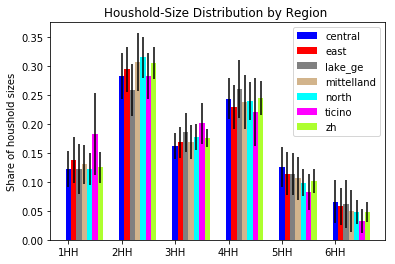

In [166]:
#plot bar char
central_mean, central_std = regions_hh_mean.loc["central"], regions_hh_std.loc["central"]
east_mean, east_std = regions_hh_mean.loc["east"], regions_hh_std.loc["east"]
lake_ge_mean, lake_ge_std = regions_hh_mean.loc["lake_ge"], regions_hh_std.loc["lake_ge"]
mittelland_mean, mittelland_std = regions_hh_mean.loc["mittelland"], regions_hh_std.loc["mittelland"]
north_mean, north_std = regions_hh_mean.loc["north"], regions_hh_std.loc["north"]
ti_mean, ti_std = regions_hh_mean.loc["ti"], regions_hh_std.loc["ti"]
zh_mean, zh_std = regions_hh_mean.loc["zh"], regions_hh_std.loc["zh"]

ind = np.arange(6)  # the x locations for the groups
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, central_mean, width, yerr=central_std,
                color='blue', label='central')
rects2 = ax.bar(ind+width, east_mean, width, yerr=east_std,
                color='red', label='east')
rects3 = ax.bar(ind + 2*width, lake_ge_mean, width, yerr=lake_ge_std,
                color='gray', label='lake_ge')
rects4 = ax.bar(ind + 3*width, mittelland_mean, width, yerr=mittelland_std,
                color='tan', label='mittelland')
rects5 = ax.bar(ind + 4*width, north_mean, width, yerr=north_std,
                color='cyan', label='north')
rects6 = ax.bar(ind + 5*width, ti_mean, width, yerr=ti_std,
                color='magenta', label='ticino')
rects7 = ax.bar(ind + 6*width, zh_mean, width, yerr=zh_std,
                color='greenyellow', label='zh')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Share of houshold sizes')
ax.set_title('Houshold-Size Distribution by Region ')
ax.set_xticks(ind)
ax.set_xticklabels(('1HH', '2HH', '3HH', '4HH', '5HH', '6HH'))
ax.legend()

plt.show()
